# Homework 1

## Exercise 1

## (a)

- Degree Calculation:
    - Degree(A) = 2 (connected to B and C)
    - Degree(B) = 3 (connected to A,C,E)
    - Degree(C) = 4 (connected to A,B,D,E)
    - Degree(D) = 2 (connected to C,F)
    - Degree(E) = 2 (connected to B,C)
    - Degree(F) = 1 (connected to D)

- Normalized P(k):
    - P(k=1) = 1/6 (node F)
    - P(k=2) = 3/6 (nodes A,D,E)
    - P(k=3) = 1/6 (node B)
    - P(k=4) = 1/6 (node C)
    - Check: 1/6 + 3/6 + 1/6 + 1/6 = 1

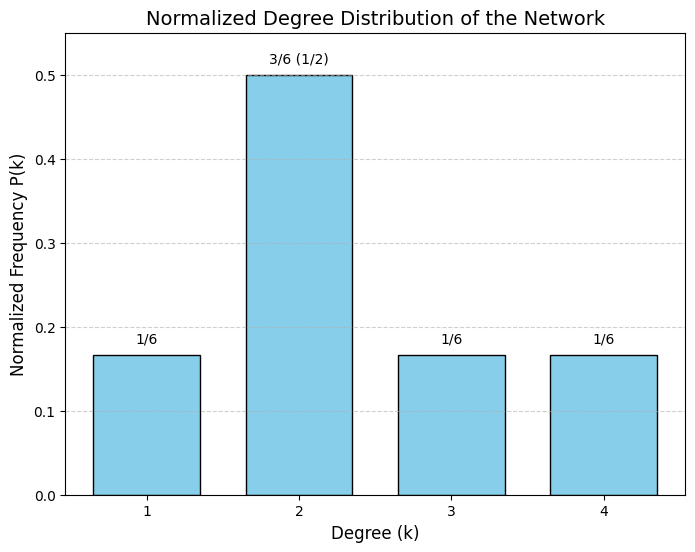

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the normalized degree distribution
degrees = [1, 2, 3, 4]
probabilities = [1/6, 3/6, 1/6, 1/6] # Using fractions directly for clarity, equivalent to [1/6, 1/2, 1/6, 1/6]

# Create the bar plot
plt.figure(figsize=(8, 6)) # Set the figure size for better readability
bars = plt.bar(degrees, probabilities, width=0.7, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel("Degree (k)", fontsize=12)
plt.ylabel("Normalized Frequency P(k)", fontsize=12)
plt.title("Normalized Degree Distribution of the Network", fontsize=14)

# Set the x-axis ticks to exactly match the degrees present
plt.xticks(degrees)

# Set the y-axis limits to start from 0 and go slightly above the max probability
plt.ylim(bottom=0, top=max(probabilities) * 1.1)

# Add the probability values on top of the bars for clarity
for bar in bars:
    yval = bar.get_height()
    # Format the fraction nicely for display
    if np.isclose(yval, 1/6):
        label = "1/6"
    elif np.isclose(yval, 3/6):
        label = "3/6 (1/2)"
    else:
        label = f"{yval:.3f}" # Fallback to decimal if needed
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, label, ha='center', va='bottom', fontsize=10)


# Add a grid for easier reading
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display the plot
plt.show()

## (b)
- Diameter: The longest shortest path in the network

- Shortest Paths:
    - d(A,B) = 1; d(A,C) = 1; d(A,D) = 2; d(A,E) = 2; d(A,F) = 3
    - d(B,C) = 1; d(B,D) = 2; d(B,E) = 1; d(B,F) = 3
    - d(C,D) = 1; d(C,E) = 1; d(C,F) = 2
    - d(D,E) = 2; d(D,F) = 1
    - d(E,F) = 3

- Longest Shortest Path (diameter): The longest shortest path is 3 (between A and F, B and F, E and F)

- Average Path Length: Avergae of all shortest path lengths
    - Number of pairs = (6*5)/2 = 2
    - Sum of shortest paths = 1+1+2+2+3+1+2+1+3+1+1+2+2+1+3 = 26
    - Average path length = Sum of shortest paths / Number of pairs = 26 / 15 = 1.733

## (c)
- Max edges = degree * (degree-1) / 2

- Local Clustering Coefficient for each node:
    - C(A) -> Max edges = 1; Actual Edges = 1 (B,C); C(A) = 1/1 = 1
    - C(B) -> Max edges = 3; Actual Edges = 2 {(A,C), (C,E)}; C(B) = 2/3
    - C(C) -> Max edges = 6; Actual Edges = 2 {(A,B),(B,E)}; C(C) = 2/6 = 1/3
    - C(D) -> Max edges = 1; Actual Edges = 0; C(D) = 0
    - C(E) -> Max edges = 1; Actual Edges = 1 (B,C); C(E) = 1
    - C(F) = 0 (less than 2 neighbours)

- Average Local Clustering Coefficient = (1 + 2/3 + 1/3 + 0 + 1 + 0) / 6 = 0.5

## (d)
- Betweeness Centrality: Measures how often a node lies on the shortest paths between other nodes.
- Maximum Possible for N nodes: (N-1)(N-1)/2 = 10

- Betweenness Centrality for each node:
    - A -> 0
    - B -> A-E (path A-B-E, 1/2 contribution as A-C-E is also shortest) -> 0.5
    - C -> A-D (1), A-E (path A-C-E, 1/2), A-F (1), B-D (1), B-F (1), D-E (1), E-F (1) -> 1 + 0.5 + 1 + 1 + 1 + 1 + 1 = 6.5
    - D -> A-F (1), B-F (1), C-F (1), E-F (1) -> 1 + 1 + 1 + 1 = 4
    - E -> 0
    - F -> 0

- Normalized BC:
    - BC(A) = 0 / 10 = 0
    - BC(B) = 0.5 / 10 = 0.05
    - BC(C) = 6.5 / 10 = 0.65
    - BC(D) = 4 / 10 = 0.4
    - BC(E) = 0 / 10 = 0
    - BC(F) = 0 / 10 = 0

- Closeness Centrality:
    - Sum of Distances on each node:
        - Sum of Distances on Node A: 1+1+2+2+3 = 9
        - Sum of Distances on Node B: 1+1+2+1+3 = 8
        - Sum of Distances on Node C: 1+1+1+1+2 = 6
        - Sum of Distances on Node D: 2+2+1+2+1 = 8
        - Sum of Distances on Node E: 2+1+1+2+3 = 9
        - Sum of Distances on Node F: 3+3+2+1+3 = 12

    - Closeness Centrality for each node (N-1=5):
        - CC(A) = 5/9
        - CC(B) = 5/8
        - CC(C) = 5/6
        - CC(D) = 5/8
        - CC(E) = 5/9
        - CC(F) = 5/12

## Exercise 2
The global clustering Coefficient metric gives a single value representing the overall tendency for nodes in the network to cluster together. It essentially asks: "Out of all possible triangles (based on existing paths of length 2), what fraction actually exist?". While, the Local clustering Coefficient metric first calculates how clustered the neighborhood around each node is, and then averages these individual values across the entire network.

- Global clustering Coefficient
    - The denominator ("number of triplets") counts all connected paths of length two (A-B-C) where a node with a high degree k acts as the central node (like 'B' in A-B-C) for a large number of triplets (high-degree nodes contribute disproportionately large numbers of triplets to the denominator).
    - The numerator ("number of triangles") counts  closed triplets. Besides that, triangles involving high-degree nodes also contribute significantly to this count (multiplied by 3).

- Local clustering Coefficient
    - Each node's Ci contributes equally to the final average (with a weight of 1/N).
    - The local clustering coefficient Ci of a high-degree node counts exactly the same as the Ci of a low-degree node when calculating the average.
    - Local Clustering Coefficient can be heavily influenced by the many low-degree nodes in a network, even if their individual contribution to the total number of triangles or triplets in the network is small. If many low-degree nodes have high local clustering (e.g., Ci=1), they can significantly raise Local Clustering Coefficient, regardless of the clustering around high-degree hubs

- So, The Global Clustering Coefficient measures the overall density of triangles relative to all possible triangles (triplets) across the entire network. Because high-degree nodes participate in vastly more triplets than low-degree nodes, the connectivity patterns in their neighborhoods heavily influence this global ratio.
In contrast, the Average Local Clustering Coefficient first calculates a clustering score for each node individually, based only on its immediate neighbors. It then computes a simple average of these individual scores. In this average, every node's score has equal weight, regardless of its degree. This equal weighting per node tends to lessen the overall impact of high-degree nodes compared to their strong influence on Global Clustering Coefficient.

- So, to conclude, the Global Clustering Coefficient gives more importance to high-degree nodes.

## Exercise 4

In [10]:
import numpy as np
import random
import matplotlib.pyplot as plt

class Graph:
    def __init__(self, n: int = None, filename: str = None):
        """
        Initializes a graph with n nodes (with no connections) or loads it from a file.
        Sets all nodes as unvisited.
        """
        if filename:
            with open(filename, 'r') as file:
                first_line = file.readline().strip()
                if first_line:
                    self.n = int(first_line)
                    self.adj_matrix = [[0 for _ in range(self.n)] for _ in range(self.n)]
                for line in file:
                    a, b = map(int, line.strip().split())
                    self.add_edge(a - 1, b - 1)
        elif n is not None:
            self.n = n
            self.adj_matrix = [[0 for _ in range(n)] for _ in range(n)]
        else:
            raise ValueError("Either 'n' or 'filename' must be provided.")
        self.visited = [False] * self.n

    def add_edge(self, a : int, b : int):
        self.adj_matrix[a][b] = 1
        self.adj_matrix[b][a] = 1

    def add_edges(self, a : int, targets : list):
        for target in targets:
            self.add_edge(a, target)
 
    def has_edge(self, a, b):
        return self.adj_matrix[a][b] == 1

    def save_to_file(self, filename):
        with open(filename, 'w') as file:
            file.write(f"{self.n}\n")
            for i in range(self.n):
                for j in range(i + 1, self.n):
                    if self.adj_matrix[i][j] == 1:
                        file.write(f"{i + 1} {j + 1}\n")

    def calculate_giant_component_size(self):
        self._set_all_unvisited()
        max_size = 0
        for i in range(self.n):
            if not self.visited[i]:
                size = self.component_size(i)
                max_size = max(max_size, size)
        return max_size

    def component_size(self, node):
        stack = [node]
        size = 0
        while stack:
            current_node = stack.pop()
            if not self.visited[current_node]:
                self.visited[current_node] = True
                size += 1
                for neighbor in self._get_neighbors(current_node):
                    if not self.visited[neighbor]:
                        stack.append(neighbor)
        return size
    
    def get_degree_of_node(self, node):
        return sum(self.adj_matrix[node])
    
    def _set_all_unvisited(self):
        self.visited = [False] * self.n

    def _get_neighbors(self, node):
        return [i for i in range(self.n) if self.adj_matrix[node][i] == 1]

In [2]:
class ErdosRenyiModel(Graph):
    def __init__(self, n : int, p : float):
        super().__init__(n)
        self.p = p
        self._generate_graph()

    def _generate_graph(self):
        for i in range(self.n):
            for j in range(i + 1, self.n):
                if random.random() < self.p:
                    self.add_edge(i, j)

In [11]:
# Exercise 4
net1 = ErdosRenyiModel(n = 2000, p = 0.0001)
net2 = ErdosRenyiModel(n = 2000, p = 0.005)
net1.save_to_file('docs/random1.txt')
net2.save_to_file('docs/random2.txt')

## Exercise 5

In [12]:
net1 = Graph(filename='docs/random1.txt')
net2 = Graph(filename='docs/random2.txt')
print(f"Size of the giant component in random1.txt: {net1.calculate_giant_component_size()}")
print(f"Size of the giant component in random2.txt: {net2.calculate_giant_component_size()}")

Size of the giant component in random1.txt: 4
Size of the giant component in random2.txt: 2000


## Exercise 6

p: 0.0001, Size of the giant component: 4
p: 0.0002, Size of the giant component: 8
p: 0.0003, Size of the giant component: 11
p: 0.0004, Size of the giant component: 61
p: 0.0005, Size of the giant component: 246
p: 0.0006, Size of the giant component: 366
p: 0.0007, Size of the giant component: 949
p: 0.0008, Size of the giant component: 1334
p: 0.0009, Size of the giant component: 1469
p: 0.0010, Size of the giant component: 1592
p: 0.0011, Size of the giant component: 1687
p: 0.0012, Size of the giant component: 1786
p: 0.0013, Size of the giant component: 1816
p: 0.0014, Size of the giant component: 1819
p: 0.0015, Size of the giant component: 1884
p: 0.0016, Size of the giant component: 1917
p: 0.0017, Size of the giant component: 1898
p: 0.0018, Size of the giant component: 1923
p: 0.0019, Size of the giant component: 1950
p: 0.0020, Size of the giant component: 1968
p: 0.0021, Size of the giant component: 1976
p: 0.0022, Size of the giant component: 1972
p: 0.0023, Size of the 

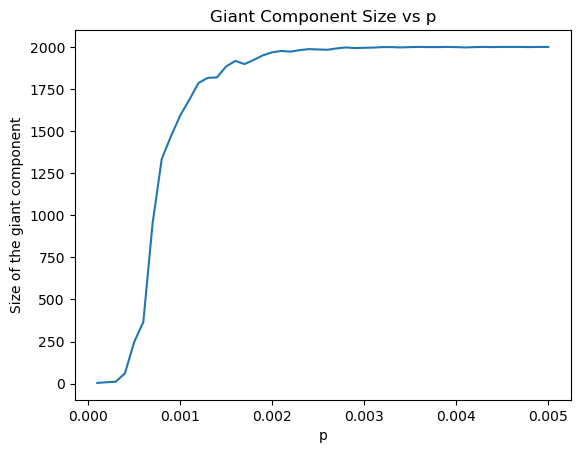

In [13]:
min_p = 0.0001
max_p = 0.005
p_step = 0.0001
sizes = {}

while min_p <= max_p:
    net = ErdosRenyiModel(n=2000, p=min_p)
    size = net.calculate_giant_component_size()
    sizes[min_p] = size
    print(f"p: {min_p:.4f}, Size of the giant component: {size}")
    min_p += p_step

plt.plot(sizes.keys(), sizes.values())
plt.xlabel('p')
plt.ylabel('Size of the giant component')
plt.title('Giant Component Size vs p')
plt.savefig('docs/ex6.png')
plt.show()

## Exercise 7

In [14]:
class BarabasiAlbertModel(Graph):
    def __init__(self, n: int, m0: int, m: int):
        """
        Efficient implementation of Barabási-Albert model
        
        Parameters:
        - n: total number of nodes in the graph
        - m0: initial number of nodes in a fully connected graph
        - m: number of edges to attach from a new node to existing nodes
        """
        super().__init__(n)
        self.m0 = m0
        self.m = m
        # Track node degrees for efficient preferential attachment
        self.degrees = [0] * n
        # Total number of edges (each edge counted twice, once for each endpoint)
        self.total_edges = 0
        self._generate_graph()
    
    def add_edge(self, a: int, b: int):
        """Override add_edge to update degrees and total_edges"""
        if not self.has_edge(a, b):
            self.adj_matrix[a][b] = 1
            self.adj_matrix[b][a] = 1
            self.degrees[a] += 1
            self.degrees[b] += 1
            self.total_edges += 2
    
    def _generate_graph(self):
        # Fully connected graph with m0 nodes
        for i in range(self.m0):
            for j in range(i + 1, self.m0):
                self.add_edge(i, j)
        
        # Add new nodes one by one
        for i in range(self.m0, self.n):
            targets = self._choose_targets_efficiently(i)
            for target in targets:
                self.add_edge(i, target)
    
    def _choose_targets_efficiently(self, new_node):
        """
        Efficient implementation of preferential attachment using stochastic acceptance
        """
        targets = set()
        max_degree = max(self.degrees[:new_node]) or 1  # Avoid division by zero
        
        while len(targets) < min(self.m, new_node):  # Ensure we don't try to add more edges than possible
            # Select a random node
            candidate = random.randint(0, new_node - 1)
            # Accept with probability proportional to its degree
            if random.random() < self.degrees[candidate] / max_degree:
                if candidate not in targets:
                    targets.add(candidate)
        
        return list(targets)
    
    def get_degree_of_node(self, node):
        """Return the degree directly from our tracking array"""
        return self.degrees[node]

In [15]:
# Exercise 5
print("Generating net1")
net1 = BarabasiAlbertModel(n=2000, m0=3, m=1)
print("Generating net2")
net2 = BarabasiAlbertModel(n=2000, m0=5, m=2)
net1.save_to_file('docs/ba1.txt')
net2.save_to_file('docs/ba2.txt')

Generating net1
Generating net2


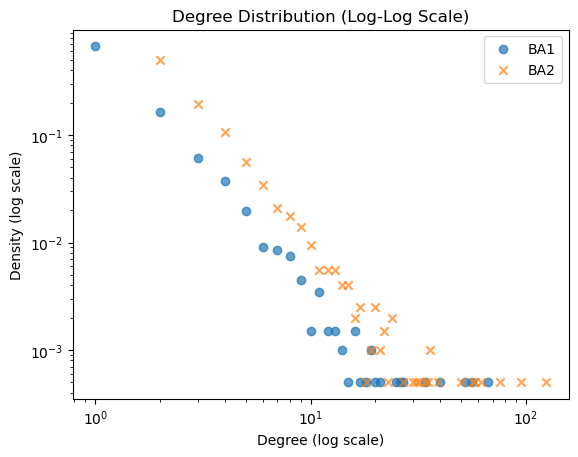

In [16]:
ba1 = Graph(filename='docs/ba1.txt')
ba2 = Graph(filename='docs/ba2.txt')
degrees1 = [ba1.get_degree_of_node(i) for i in range(ba1.n)]
degrees2 = [ba2.get_degree_of_node(i) for i in range(ba2.n)]

unique_degrees1, counts1 = np.unique(degrees1, return_counts=True)
unique_degrees2, counts2 = np.unique(degrees2, return_counts=True)
density1 = counts1 / sum(counts1)
density2 = counts2 / sum(counts2)

plt.scatter(unique_degrees1, density1, alpha=0.7, label='BA1', marker='o')
plt.scatter(unique_degrees2, density2, alpha=0.7, label='BA2', marker='x')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree (log scale)')
plt.ylabel('Density (log scale)')
plt.title('Degree Distribution (Log-Log Scale)')
plt.legend()
plt.savefig('docs/ex8_loglog_points.png')
plt.show()